# Ultralytics


![detr](./images/ultralytics.png)

[Ultralytics](https://docs.ultralytics.com/) es una biblioteca de Python muy práctica para utilizar o entrenar modelos YOLO. Su documentación es excelente, pero aquí te mostraremos dos modelos YOLO. ¡Y adivina qué! Esta librería también puede ejecutar [SAM](https://segment-anything.com/) (*segment anything*).


## YOLO


Con todos los modelos YOLO (YOLOv4, YOLOv5, YOLO-NAS, etc.), es fácil perderse. Mi consejo: ¡pruébalos tú mismo! Los autores son diferentes, por lo que es difícil decir cuál es el mejor modelo.


### [YOLOv8](https://sh-tsang.medium.com/review-yolov8-object-detection-5214fa105731)


Para la mayoría de los modelos YOLO (excepto YOLO-World), la forma de cargar el modelo y realizar la inferencia es la misma.
En la página de la [documentación de YOLOv8](https://docs.ultralytics.com/models/yolov8/#performance-metrics), verás que hay varios modelos disponibles.

![yolov8](./images/yolov8.png)


¡YOLOv8 no es solo detección! También puede realizar:
- [Segmentación semántica](https://docs.ultralytics.com/tasks/segment/)
- [Estimación de postura](https://docs.ultralytics.com/tasks/pose/) (posición de una persona en la imagen, su esqueleto)
- [Detección orientada](https://docs.ultralytics.com/fr/tasks/obb/#visual-samples) (las *bounding boxes* pueden estar orientadas)
- [Clasificación](https://docs.ultralytics.com/tasks/classify/#export)


En este cuaderno, nos centraremos en un ejemplo de detección.

Para empezar, debes descargar un modelo. La elección depende de tus recursos y de la velocidad que desees. Cuanto más grande sea el modelo, mejor será su rendimiento, pero más lento será.


Tomemos el modelo más rápido, yolov8n.
Aquí te mostramos cómo cargarlo con la biblioteca Ultralytics:


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# On charge le modèle pre-entrainé YOLOv8n
model = YOLO("yolov8n.pt")

# Affiche les informations du modèle
model.info()

# On fait une prédiction sur une image
results = model("images/coco.jpg")

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco.jpg: 448x640 6 persons, 2 cars, 1 backpack, 3 handbags, 5 cell phones, 79.1ms
Speed: 1.1ms preprocess, 79.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


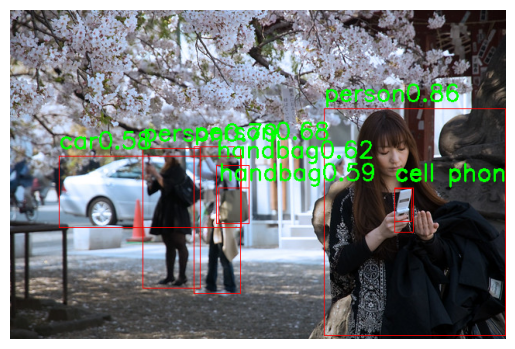

In [2]:
# Seuil de détection
threshold=0.5
# Les noms des classes
names={0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
image=cv2.imread("images/coco.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#Conversion de l'image en RGB
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

¡En pocas líneas de código, hemos podido utilizar el modelo YOLOv8!


### [YOLO-World](https://arxiv.org/pdf/2401.17270)


YOLO-World es la nueva versión de YOLO que realiza detección de *vocabulario abierto*. Las versiones anteriores están entrenadas en clases específicas (generalmente las 80 clases de [COCO](https://cocodataset.org/#home)), por lo que es necesario reentrenarlas o afinarlas para otras clases. YOLO-World, en cambio, puede detectar cualquier clase. Solo es necesario proporcionar un *prompt* textual junto con la imagen de entrada.

![yolov8](./images/yoloworld.png)


Para usarlo, es casi igual que otro modelo YOLO, excepto que hay que añadir un *prompt* textual.


In [3]:
# On charge le modèle pre-entrainé YOLOv8s-world
model = YOLO("yolov8s-worldv2.pt") 

# On définit les classes du modèle
model.set_classes(["person", "surfboard"])
names={0: 'person', 1: 'surfboard'}

# On fait une prédiction sur notre image
results = model.predict("images/coco2.jpg")


image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco2.jpg: 640x384 2 persons, 1 surfboard, 155.2ms
Speed: 2.6ms preprocess, 155.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)


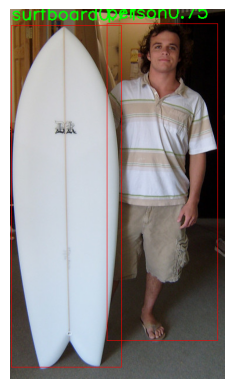

In [4]:
# Seuil de détection
threshold=0.5
# Les noms des classes
image=cv2.imread("images/coco2.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

Se detecta correctamente a la persona y la tabla de surf.


## Segment Anything (SAM)


[SAM](https://segment-anything.com/) es un modelo de segmentación que permite segmentar cualquier objeto. Ya lo hemos utilizado en [el curso 6 sobre HuggingFace](../06_HuggingFace/README.md). También puedes usarlo a través de la biblioteca Ultralytics. ¡Tú decides!

Aquí te mostramos cómo usarlo con Ultralytics en Python:


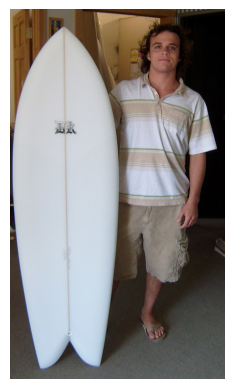

In [5]:
from PIL import Image
raw_image = Image.open("images/coco2.jpg")
plt.imshow(raw_image)
plt.axis('off')
plt.show()


Utilizamos FastSAM, una versión más rápida de SAM. Puedes descargar los pesos desde este [enlace](https://docs.ultralytics.com/models/fast-sam/#available-models-supported-tasks-and-operating-modes).


In [6]:
from ultralytics import FastSAM

resized_image=raw_image.resize((1024,1024))
model = FastSAM('./FastSAM-s.pt')

In [7]:
results = model(resized_image,retina_masks=True)


0: 640x640 30 objects, 292.8ms
Speed: 4.2ms preprocess, 292.8ms inference, 199.2ms postprocess per image at shape (1, 3, 640, 640)


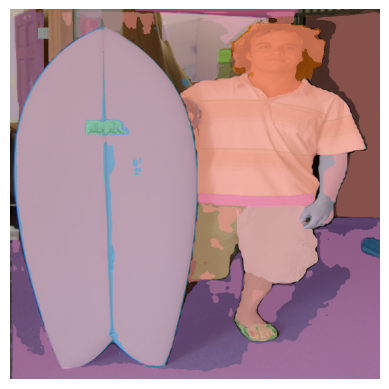

In [39]:
import numpy as np

def draw_masks(image,masks):
    image_np = np.array(image)
    plt.cm.get_cmap('tab20', 38)
    colors = plt.cm.get_cmap('tab20', 38)
    for i, mask in enumerate(masks):
        color = colors(i)[:3] 
        color = tuple(int(c * 255) for c in color) 
        mask =mask.data.squeeze().numpy()>0.5
        image_np[mask] = image_np[mask] * 0.5 + np.array(color) * 0.5       
    return image_np

image_np = draw_masks(resized_image,results[0].masks)
plt.imshow(image_np)
plt.axis('off')
plt.show()

Los resultados son moderados, pero es el modelo más pequeño de FastSAM y es muy rápido (puedes compararlo con el tiempo de procesamiento del cuaderno 2 del curso 6 sobre Hugging Face).

**Nota**: También puedes hacer *prompts* con puntos, *boxes* o texto (consulta la [documentación](https://docs.ultralytics.com/models/fast-sam/#predict-usage) para más detalles).


¡Ahora ya sabes cómo utilizar modelos rápidos de detección y segmentación de imágenes con la biblioteca Ultralytics!
